In [1]:
import numpy as np
import os
import netCDF4
from scipy import stats
from scipy import linalg as lin
from scipy import signal as sig
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
from sstanalysis import gfd
from sstanalysis import popmodel
reload(popmodel)

<module 'sstanalysis.popmodel' from 'sstanalysis/popmodel.py'>

From geostrophic balance

$$ \textbf{u} = \frac{g}{f} \ \textbf{k} \times \nabla \eta $$

and expressing both sides as Fourier components

$$ u = \iint \tilde{u}(k,l) \ e^{i(kx+ly)} \ dkdl = -\frac{g}{f} \ \frac{\partial}{\partial y} \iint \tilde{\eta}(k,l) \ e^{i(kx+ly)} \ dkdl = -i\frac{g}{f} \iint l \ \tilde{\eta}(k,l) \ e^{i(kx+ly)} \ dkdl = \frac{g}{f} \iint l \ \tilde{\eta}(k,l) \ e^{i(kx+ly-\frac{\pi}{2})} \ dkdl $$

$$ v = \iint \tilde{v}(k,l) \ e^{i(kx+ly)} \ dkdl = \frac{g}{f} \ \frac{\partial}{\partial x} \iint \tilde{\eta}(k,l) \ e^{i(kx+ly)} \ dkdl = i\frac{g}{f} \iint k \ \tilde{\eta}(k,l) \ e^{i(kx+ly)} \ dkdl = \frac{g}{f} \iint k \ \tilde{\eta}(k,l) \ e^{i(kx+ly+\frac{\pi}{2})} \ dkdl $$

Hence, 

$$ \frac{1}{2} \big( u^2+v^2 \big) = \frac{1}{2} \iint^{\infty}_{-\infty} \big( |\tilde{u}(k,l)|^2 + |\tilde{v}(k,l)|^2 \big) \ dkdl = \frac{1}{2} \Big(\frac{g}{f} \Big)^2 \iint^{\infty}_{-\infty} K^2 |\tilde{\eta}(k,l)|^2 \ dkdl $$

$<$Supplement$>$
The variable $\tilde{\eta}(k,l)$ is also a complex number, viz

$$ \tilde{\eta}(k,l) = r \ e^{i\phi} $$

$$ \therefore i \ \tilde{\eta}(k,l) = i \ r \big( \cos (kx+ly)+i\sin (kx+ly) \big) = r \big( i\cos (kx+ly)-\sin (kx+ly) \big) $$

$$ \big| \tilde{\eta}(k,l) \big|^2 = \tilde{\eta}(k,l) {\tilde{\eta}}^*(k,l) = r^2 e^{i\phi} e^{-i\phi} = r^2 $$

## Surface Velocity ##

In [3]:
NtFeb = 0.
# load data files
base_dir = '../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/'

nday = 1
for yearnum in np.arange(1,6):
    daynum = 0
    #for month in np.arange(1,13):
    fname = os.path.join(base_dir, 
                         'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday%1d.%04d-02-01.nc' 
                         % (nday, yearnum+45))
    print fname
    p = popmodel.POPFile(fname)
    #T = p.nc.variables['SST'][:]
    Nt_Feb, Nx, Ny, k, l, PSD_Feb_u, Ki, isospec_Feb_u, area, lon_vel, lat_vel, land_frac, crit = p.power_spectrum_2d(
                                                                                        varname='U1_1', lonname='ULONG', latname='ULAT', maskname='KMU')
    Nt_Feb, Nx, Ny, k, l, PSD_Feb_v, Ki, isospec_Feb_v, area, lon_vel, lat_vel, land_frac, crit = p.power_spectrum_2d(
                                                                                        varname='V1_1', lonname='ULONG', latname='ULAT', maskname='KMU')
    if yearnum == 1:
        Ky, Kx = PSD_Feb_u.shape
        PSD_sum_Feb_u = np.zeros((Ky, Kx))
        PSD_sum_Feb_v = np.zeros((Ky, Kx))
    PSD_sum_Feb_u += PSD_Feb_u
    PSD_sum_Feb_v += PSD_Feb_v
    #NtFeb += Nt_Feb

PSD_ave_Feb_u = PSD_sum_Feb_u/yearnum
PSD_ave_Feb_v = PSD_sum_Feb_v/yearnum
PSD_ave_Feb_Vel = .5*(PSD_ave_Feb_u + PSD_ave_Feb_v)
Energy_Feb_Vel = PSD_ave_Feb_Vel.sum()

../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-02-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0047-02-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0048-02-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0049-02-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0050-02-01.nc


sstanalysis/popmodel.py:241: RuntimeWarning: invalid value encountered in divide
  np.bincount(Kidx, weights=(breve_ave).ravel()) / area )[1:] *Ki*2.*np.pi**2


In [4]:
NtAug = 0.
# load data files
base_dir = '../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/'

nday = 1
for yearnum in np.arange(1,6):
    daynum = 0
    #for month in np.arange(1,13):
    fname = os.path.join(base_dir, 
                         'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday%1d.%04d-08-01.nc' 
                         % (nday, yearnum+45))
    print fname
    p = popmodel.POPFile(fname)
    #T = p.nc.variables['SST'][:]
    Nt_Feb, Nx, Ny, k, l, PSD_Aug_u, Ki, isospec_Aug_u, area, lon_vel, lat_vel, land_frac, crit = p.power_spectrum_2d(
                                                                                        varname='U1_1', lonname='ULONG', latname='ULAT', maskname='KMU')
    Nt_Feb, Nx, Ny, k, l, PSD_Aug_v, Ki, isospec_Aug_v, area, lon_vel, lat_vel, land_frac, crit = p.power_spectrum_2d(
                                                                                        varname='V1_1', lonname='ULONG', latname='ULAT', maskname='KMU')
    if yearnum == 1:
        Ky, Kx = PSD_Aug_u.shape
        PSD_sum_Aug_u = np.zeros((Ky, Kx))
        PSD_sum_Aug_v = np.zeros((Ky, Kx))
    PSD_sum_Aug_u += PSD_Aug_u
    PSD_sum_Aug_v += PSD_Aug_v
    #NtFeb += Nt_Feb

PSD_ave_Aug_u = PSD_sum_Aug_u/yearnum
PSD_ave_Aug_v = PSD_sum_Aug_v/yearnum
PSD_ave_Aug_Vel = .5*(PSD_ave_Aug_u + PSD_ave_Aug_v)
Energy_Aug_Vel = PSD_ave_Aug_Vel.sum()

../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-08-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0047-08-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0048-08-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0049-08-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0050-08-01.nc


## Sea-surface Height ##

In [5]:
NtFeb = 0.
# load data files
base_dir = '../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/'

nday = 1
for yearnum in np.arange(1,6):
    daynum = 0
    #for month in np.arange(1,13):
    fname = os.path.join(base_dir, 
                           'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday%1d.%04d-02-01.nc' 
                           % (nday, yearnum+45))
    print fname
    p = popmodel.POPFile(fname)
    #T = p.nc.variables['SST'][:]
    Nt_Feb, Nx_H, Ny_H, k_H, l_H, PSD_Feb_H, Ki_H, isospec_Feb_H, area, lon_SSH, lat_SSH, land_frac, crit = p.power_spectrum_2d(
                                                                                        varname='SSH_2', lonname='TLONG', latname='TLAT', maskname='KMT')
    if yearnum == 1:
        N = len(Ki_H)
        L,K = PSD_Feb_H.shape
        PSD_sum_Feb_H = np.zeros((L,K))
    PSD_sum_Feb_H += PSD_Feb_H
    #NtFeb += Nt_Feb

PSD_ave_Feb_SSH = PSD_sum_Feb_H/yearnum

../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-02-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0047-02-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0048-02-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0049-02-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0050-02-01.nc


In [6]:
NtAug = 0.
# load data files
base_dir = '../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/'

nday = 1
for yearnum in np.arange(1,6):
    daynum = 0
    #for month in np.arange(1,13):
    fname = os.path.join(base_dir, 
                           'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday%1d.%04d-08-01.nc' 
                           % (nday, yearnum+45))
    print fname
    p = popmodel.POPFile(fname)
    #T = p.nc.variables['SST'][:]
    Nt_Feb, Nx_H, Ny_H, k_H, l_H, PSD_Aug_H, Ki_H, isospec_Aug_H, area, lon_SSH, lat_SSH, land_frac, crit = p.power_spectrum_2d(
                                                                                        varname='SSH_2', lonname='TLONG', latname='TLAT', maskname='KMT')
    if yearnum == 1:
        N = len(Ki_H)
        L,K = PSD_Aug_H.shape
        PSD_sum_Aug_H = np.zeros((L,K))
    PSD_sum_Aug_H += PSD_Aug_H
    #NtFeb += Nt_Feb

PSD_ave_Aug_SSH = PSD_sum_Aug_H/yearnum

../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-08-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0047-08-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0048-08-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0049-08-01.nc
../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0050-08-01.nc


In [7]:
kk, ll = np.meshgrid(k_H, l_H)
K = np.sqrt(kk**2 + ll**2)
grav = gfd.g
cori = gfd.f_coriolis(.5*(lat_SSH[0,int(Nx_H/2)]+lat_SSH[-1,int(Nx_H/2)]))

print K.shape, PSD_ave_Feb_SSH.shape

(169, 167) (169, 167)


In [8]:
Energy_Feb_geoVel = (.5*(grav/cori*K)**2*PSD_ave_Feb_SSH).sum()
Energy_Aug_geoVel = (.5*(grav/cori*K)**2*PSD_ave_Aug_SSH).sum()

In [9]:
print Energy_Feb_Vel/Energy_Feb_geoVel
print Energy_Aug_Vel/Energy_Aug_geoVel

34.1621369706
37.850812365


The zonal geostrophic balance is 

$$ v_g = \frac{g}{f_0}\frac{\partial \eta}{\partial x} $$

In [7]:
base_dir = '../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/'
fname = base_dir + 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-02-01.nc'
f = netCDF4.Dataset(fname)
p = popmodel.POPFile(fname)

In [23]:
#p.initialize_gradient_operator()
#jmin, jmax, imin, imax, roll, lon_SSH, lat_SSH, deta_dx, deta_dy, gradeta = p.gradient_modulus(varname='SSH_2')
roll = -1000
west, est, sud, nord = 154.9, 171.7, 30., 45.4
#lonrange=(154.9,171.7), latrange=(30,45.4)
lonrange=np.array([west,est]) 
latrange=np.array([sud,nord])

#SSH = np.roll(f.variables['SSH_2'], roll)    # SST(time, lat, lon)
V = np.roll(f.variables['V1_1'], roll)
tlon = np.roll(f.variables['ULONG'][:], roll)
tlat = np.roll(f.variables['ULAT'][:], roll)
#print SSH.shape

# step 1: figure out the box indices
lonmask = (tlon >= lonrange[0]) & (tlon < lonrange[1])
latmask = (tlat >= latrange[0]) & (tlat < latrange[1])
boxidx = lonmask & latmask    # this won't necessarily be square
irange = np.where(boxidx.sum(axis=0))[0]
imin, imax = irange.min(), irange.max()
jrange = np.where(boxidx.sum(axis=1))[0]
jmin, jmax = jrange.min(), jrange.max()
#print imin, imax, jmin, jmax

#lat = tlat[jmin:jmax, imin:imax]
#lon = tlon[jmin:jmax, imin:imax]     
#dlon = np.roll(tlon,1)-np.roll(tlon, -1)
#dlat = np.roll(tlat,1)-np.roll(tlat, -1)  
#deta_dx = 1e-2*(np.roll(SSH,1)-np.roll(SSH,-1))/(gfd.A*np.cos(np.radians(tlat))*np.radians(dlon))

#deta_dx_domain = deta_dx[:, jmin:jmax, imin:imax]
lon, lat, deta_dx_domain, deta_dy_domain = p.gradient_modulus(varname='SSH_2')
V_domain = 1e-2*V[:, jmin:jmax, imin:imax]

dlonx = lon[np.round(np.floor(lon.shape[0]*0.5)), np.round(
                     np.floor(lon.shape[1]*0.5))+1]-lon[np.round(
                     np.floor(lon.shape[0]*0.5)), np.round(np.floor(lon.shape[1]*0.5))]
dlaty = lat[np.round(np.floor(lat.shape[0]*0.5))+1, np.round(
                     np.floor(lat.shape[1]*0.5))]-lat[np.round(
                     np.floor(lat.shape[0]*0.5)), np.round(np.floor(lat.shape[1]*0.5))]
#dx = gfd.A * np.cos(np.radians(lat[np.round(
#                         np.floor(lat.shape[0]*0.5)),np.round(
#                         np.floor(lat.shape[1]*0.5))])) * np.radians(dlonx)
#dy = gfd.A * np.radians(dlaty) 

print deta_dx_domain.shape, V_domain.shape#, dx

(28, 168, 166) (28, 168, 166)


In [24]:
Ny, Nx = lat.shape
print Ny, Nx

grav = gfd.g
cori = gfd.f_coriolis(lat[Ny/2,Nx/2])
#cori = gfd.f_coriolis(.5*(lat[0,int(Nx/2)]+lat[-1,int(Nx/2)]))

168 166


In [29]:
geoV_domain = grav/cori*deta_dx_domain
print geoV_domain.shape

(28, 168, 166)


In [31]:
print (geoV_domain**2).sum()/(V_domain**2).sum()

0.905699012291


<matplotlib.colorbar.Colorbar instance at 0x7f7feb297cf8>

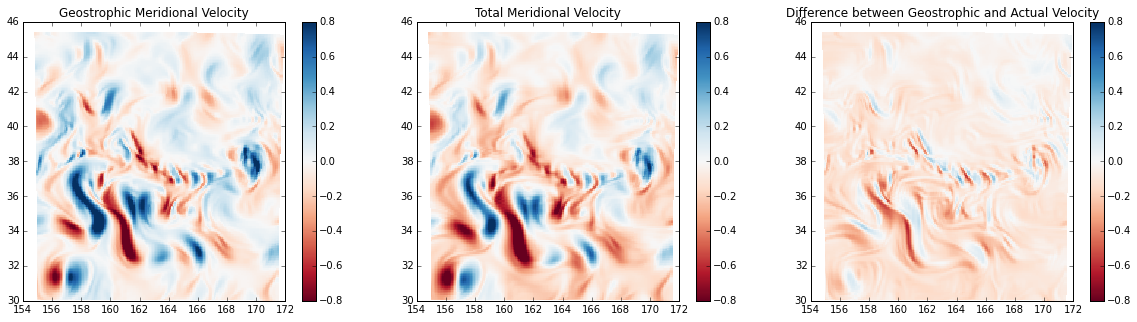

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.pcolormesh(lon, lat, geoV_domain[0], cmap='RdBu')
plt.title('Geostrophic Meridional Velocity')
plt.clim(-0.8,0.8)
plt.colorbar()
plt.subplot(132)
plt.pcolormesh(lon, lat, V_domain[0], cmap='RdBu')
plt.title('Total Meridional Velocity')
plt.clim(-0.8,0.8)
plt.colorbar()
plt.subplot(133)
plt.pcolormesh(lon, lat, V_domain[0]-geoV_domain[0], cmap='RdBu')
plt.title('Difference between Geostrophic and Actual Velocity')
plt.clim(-0.8,0.8)
plt.colorbar()

In [14]:
p = popmodel.POPFile(fname)
#T = p.nc.variables['SST'][:]
Nt_Feb, Nx_H, Ny_H, k_H, l_H, spac_Feb_geoV, tilde_Feb_geoV, breve_Feb_geoV, Ki_H, isospec_Feb_H, area, lon_SSH, lat_SSH, land_frac, crit = p.power_spectrum_2d(
                varname='SSH_2', lonname='ULONG', latname='ULAT', maskname='KMU', dxname='DXU', dyname='DYU', geos=True)
dk = np.diff(k_H)[0]*.5/np.pi
dl = np.diff(l_H)[0]*.5/np.pi

In [15]:
roll = -1000
west, est, sud, nord = 154.9, 171.7, 30., 45.4
#lonrange=(154.9,171.7), latrange=(30,45.4)
lonrange=np.array([west,est]) 
latrange=np.array([sud,nord])

lon = np.roll(f.variables['TLONG'][:], roll)
lat = np.roll(f.variables['TLAT'][:], roll)
#print SSH.shape

# step 1: figure out the box indices
lonmask = (lon >= lonrange[0]) & (lon < lonrange[1])
latmask = (lat >= latrange[0]) & (lat < latrange[1])
boxidx = lonmask & latmask    # this won't necessarily be square
irange = np.where(boxidx.sum(axis=0))[0]
imin, imax = irange.min(), irange.max()
jrange = np.where(boxidx.sum(axis=1))[0]
jmin, jmax = jrange.min(), jrange.max()
#print imin, imax, jmin, jmax

tlat = lat[jmin:jmax, imin:imax]
tlon = lon[jmin:jmax, imin:imax] 
dlont = tlon[np.round(np.floor(tlon.shape[0]*0.5)), np.round(
                     np.floor(tlon.shape[1]*0.5))+1]-tlon[np.round(
                     np.floor(tlon.shape[0]*0.5)), np.round(np.floor(tlon.shape[1]*0.5))]
dlatt = tlat[np.round(np.floor(tlat.shape[0]*0.5))+1, np.round(
                     np.floor(tlat.shape[1]*0.5))]-tlat[np.round(
                     np.floor(tlat.shape[0]*0.5)), np.round(np.floor(tlat.shape[1]*0.5))]
dxt = gfd.A * np.cos(np.radians(tlat[np.round(
                         np.floor(tlat.shape[0]*0.5)),np.round(
                         np.floor(tlat.shape[1]*0.5))])) * np.radians(dlont)
dyt = gfd.A * np.radians(dlatt) 

Patch_Feb_geoV_spatial = spac_Feb_geoV.sum()/(Nx_H*dk*Ny_H*dl)
Patch_Feb_geoV_spectra = breve_Feb_geoV.sum()

Energy_Feb_geoV_spatial = spac_Feb_geoV.sum()*Nx_H*Ny_H
Energy_Feb_geoV_spectra = (Nx_H*Ny_H)**2*dk*dl*breve_Feb_geoV.sum()

In [16]:
p = popmodel.POPFile(fname)
#T = p.nc.variables['SST'][:]
Nt_Feb, Nx, Ny, k, l, spac_Feb_u, tilde_Feb_u, breve_Feb_u, Ki, isospec_Feb_u, area, lon_vel, lat_vel, land_frac, crit = p.power_spectrum_2d(
                                                            varname='U1_1', lonname='ULONG', latname='ULAT', maskname='KMU', dxname='DXU', dyname='DYU')
Nt_Feb, Nx, Ny, k, l, spac_Feb_v, tilde_Feb_v, breve_Feb_v, Ki, isospec_Feb_v, area, lon_vel, lat_vel, land_frac, crit = p.power_spectrum_2d(
                                                            varname='V1_1', lonname='ULONG', latname='ULAT', maskname='KMU', dxname='DXU', dyname='DYU')

dk = np.diff(k)[0]*.5/np.pi
dl = np.diff(l)[0]*.5/np.pi

In [17]:
#roll = -1000
#west, est, sud, nord = 154.9, 171.7, 30., 45.4
#lonrange=(154.9,171.7), latrange=(30,45.4)
#lonrange=np.array([west,est]) 
#latrange=np.array([sud,nord])

lon = np.roll(f.variables['ULONG'][:], roll)
lat = np.roll(f.variables['ULAT'][:], roll)
#print SSH.shape

# step 1: figure out the box indices
lonmask = (lon >= lonrange[0]) & (lon < lonrange[1])
latmask = (lat >= latrange[0]) & (lat < latrange[1])
boxidx = lonmask & latmask    # this won't necessarily be square
irange = np.where(boxidx.sum(axis=0))[0]
imin, imax = irange.min(), irange.max()
jrange = np.where(boxidx.sum(axis=1))[0]
jmin, jmax = jrange.min(), jrange.max()
#print imin, imax, jmin, jmax

ulat = lat[jmin:jmax, imin:imax]
ulon = lon[jmin:jmax, imin:imax] 
dlonu = ulon[np.round(np.floor(ulon.shape[0]*0.5)), np.round(
                     np.floor(ulon.shape[1]*0.5))+1]-ulon[np.round(
                     np.floor(ulon.shape[0]*0.5)), np.round(np.floor(ulon.shape[1]*0.5))]
dlatu = ulat[np.round(np.floor(ulat.shape[0]*0.5))+1, np.round(
                     np.floor(ulat.shape[1]*0.5))]-ulat[np.round(
                     np.floor(ulat.shape[0]*0.5)), np.round(np.floor(ulat.shape[1]*0.5))]
dxu = gfd.A * np.cos(np.radians(ulat[np.round(
                         np.floor(ulat.shape[0]*0.5)),np.round(
                         np.floor(ulat.shape[1]*0.5))])) * np.radians(dlonu)
dyu = gfd.A * np.radians(dlatu) 

Patch_Feb_v_spatial = spac_Feb_v.sum()/(Nx*dk*Ny*dl)
Patch_Feb_v_spectra = breve_Feb_v.sum()

Energy_Feb_v_spatial = spac_Feb_v.sum()*Nx*Ny
Energy_Feb_v_spectra = (Nx*Ny)**2*dk*dl*breve_Feb_v.sum()

In [18]:
print Patch_Feb_geoV_spatial/Patch_Feb_geoV_spectra
print Patch_Feb_v_spatial/Patch_Feb_v_spectra

1.0
1.00000000056


In [19]:
print Energy_Feb_geoV_spectra/Energy_Feb_v_spectra
print Energy_Feb_geoV_spatial/Energy_Feb_v_spatial
print Energy_Feb_v_spectra/Energy_Feb_v_spatial

1.14287420575
1.14287420511
0.999999999439


When

$$\eta (x,y) = \frac{1}{(2\pi)^2} \iint \hat{\eta}(k,l) e^{i(kx+ly)}\ dkdl,\ \ \ \hat{\eta}(k,l) = \iint \eta (x,y) e^{-i(kx+ly)}\ dxdy $$

$$ v_g(x,y) = \frac{1}{(2\pi)^2} \iint \hat{v}_g(k,l) e^{i(kx+ly)}\ dkdl,\ \ \ \hat{v}_g(k,l) = \iint v_g(x,y) e^{-i(kx+ly)}\ dxdy $$

the $\textbf{geostrophic balance}$ becomes

$$ \frac{1}{(2\pi)^2} \iint \hat{v}_g(k,l) e^{i(kx+ly)}\ dkdl = v_g(x,y) = \frac{g}{(2\pi)^2 f_0} \iint k\ \hat{\eta} (k,l) e^{i(kx+ly+\frac{\pi}{2})}\ dkdl\ \ \ \ (*) $$


The $\textbf{Plancherel theorem}$ is

$$ \iint v_g(x,y)^2\ dxdy = \iint |\hat{v}_g(k,l)|^2\ dkdl $$

and written in a discretized form, we have

$$ \Delta x\Delta y \sum_p \sum_q v_g (x_p, y_q)^2 = \sum_m \sum_n \big|\breve{v}_g(k_m,l_n)\big|^2 $$

where

$$ \hat{v}_g(k,l) = \Delta x\Delta y\ \tilde{v}_g(k,l)\ \ \ [m^3s^{-1}],\ \ \ \tilde{v}_g(k,l) = N_xN_y\sqrt{\Delta k\Delta l}\ \breve{v}_g(k,l)\ \ \ [m\ s^{-1}] $$

From the Plancherel theorem and using $(*)$, we have

$$ \frac{g^2}{{f_0}^2} \iint k^2 |\hat{\eta} (k,l)|^2\ dkdl = \iint |\hat{v}_g(k,l)|^2\ dkdl = \iint {v_g(x,y)}^2\ dxdy $$

$$\therefore\ \Delta x\Delta y\sum_p\sum_q v_g(x_p,y_q)^2 = \frac{g^2}{{f_0}^2}\Delta k\Delta l\sum_m\sum_n {k_m}^2 |\hat{\eta}(k_m,l_n)|^2\ \ \ \ [m^4s^{-2}] $$

Now 

$$ \sum_m\sum_n {k_m}^2|\hat{\eta}(k_m,l_n)|^2 = (\Delta x\Delta y)^2\sum_m\sum_n {k_m}^2|\tilde{\eta}(k_m,l_n)|^2 = (N_xN_y\Delta x\Delta y)^2\Delta k\Delta l\sum_m\sum_n {k_m}^2|\breve{\eta}(k_m,l_n)|^2 = \frac{1}{\Delta k\Delta l}\sum_m\sum_n {k_m}^2|\breve{\eta}(k_m,l_n)|^2 $$

Hence the $\textbf{Plancherel theorem}$ becomes

$$ \sum_m \sum_n \big|\breve{v}_g(k_m,l_n)\big|^2 = \Delta x\Delta y\sum_p\sum_q{v_g(x_p,y_q)}^2 = \frac{g^2}{{f_0}^2}\sum_m\sum_n {k_m}^2 |\breve{\eta}(k_m,l_n)|^2 $$

and PSD becomes

$$ E = {N_x}^2{N_y}^2\Delta k\Delta l\sum_m\sum_n \big|\breve{v}_g(k_m,l_n)\big|^2,\ \ \ P(k_m,l_n) = {N_x}^2{N_y}^2 \big|\breve{v}_g(k_m,l_n)\big|^2 $$

In [20]:
Nt_Feb, Nx, Ny, k, l, spac_Feb_SSH, tilde_Feb_SSH, breve_Feb_SSH, Ki, isospec_Feb_SSH, area, lon_SSH, lat_SSH, land_frac, crit = p.power_spectrum_2d(
                                                                                                varname='SSH_2')
kk, ll = np.meshgrid(k,l)
dk = np.diff(k)[0]*.5/np.pi
dl = np.diff(l)[0]*.5/np.pi

In [25]:
breve2_geoV_Feb_SSHspectra = (grav/cori)**2*kk**2*breve_Feb_SSH
Patch_geoV_Feb_SSHspectra = breve2_geoV_Feb_SSHspectra.sum()
PSD_geoV_SSHFeb = (Nx*Ny)**2*breve2_geoV_Feb_SSHspectra
E_geoV_SSHFeb_spectra = PSD_geoV_SSHFeb.sum()*dk*dl

In [26]:
print Energy_Feb_geoV_spectra/E_geoV_SSHFeb_spectra
print Patch_Feb_geoV_spectra/Patch_geoV_Feb_SSHspectra

0.985830134065
0.973084663812


Defining 

$$ F \equiv \mathscr{F}(\eta),\ \ \ G \equiv \mathscr{F}\Big(\frac{\partial\eta}{\partial x}\Big) $$

and assuming a plane wave solution for $\eta$, the following should hold

$$ |G|^2 = k^2|F|^2 $$

This comes from

$$ \frac{\partial}{\partial x}\frac{1}{(2\pi)^2}\iint\hat{\eta}(k,l) e^{i(kx+ly)}\ dkdl = \frac{\partial\eta}{\partial x} = \frac{1}{(2\pi)^2}\iint\mathscr{F}\Big(\frac{\partial\eta}{\partial x}\Big) e^{i(kx+ly)}\ dkdl $$

Under geostrophy

$$ |\nabla\eta | = \sqrt{\Big(\frac{\partial\eta}{\partial x}\Big)^2+\Big(\frac{\partial\eta}{\partial y}\Big)^2} = \frac{f_0}{g}\sqrt{u^2+v^2} $$

so from the Plancherel theorem

$$ \iint\big|\nabla\eta\big|^2 dxdy = \iint (k^2+l^2)\ |\hat{\eta} |^2 dkdl $$

$$ \therefore\ \Delta x\Delta y\sum_p\sum_q\big|\nabla\eta(x_p,y_q)\big|^2 = \sum_m\sum_n ({k_m}^2+{l_n}^2)\ |\breve{\eta}(k_m,l_n) |^2 $$

In [27]:
Nt_Feb, Nx, Ny, k, l, spac_Feb_dSSHdx, tilde_Feb_dSSHdx, breve_Feb_dSSHdx, Ki, isospec_Feb_SSH, area, lon_SSH, lat_SSH, land_frac, crit = p.power_spectrum_2d(
                                                                                               varname='SSH_2', dxname='DXU', dyname='DYU', grad=True)
kk, ll = np.meshgrid(k,l)
dk = np.diff(k)[0]*.5/np.pi
dl = np.diff(l)[0]*.5/np.pi

In [28]:
print (kk**2).shape, breve_Feb_SSH.shape, breve_Feb_dSSHdx.shape

print (kk**2*breve_Feb_SSH).sum()/(breve_Feb_dSSHdx.sum())
print (kk**2*tilde_Feb_SSH).sum()/(tilde_Feb_dSSHdx.sum())

(169, 167) (169, 167) (169, 167)
1.15017427623
1.14894170787


In [130]:
p.initialize_gradient_operator()
jmin, jmax, imin, imax, roll, lon, lat, lgradetal = p.mag_gradient_modulus(varname='SSH_2')

print lgradetal.shape

UnboundLocalError: local variable 'Ti' referenced before assignment

In [ ]:
lgradetal_domain = np.roll(lgradetal, roll)[..., jmin:jmax, imin:imax]
#print lgradetal_domain

Patch_gradeta_Feb_spatial = (lgradetal_domain**2).sum()/(Nx*dk*Ny*dl)
Patch_gradeta_Feb_spectra = ((kk**2+ll**2)*breve_Feb_SSH).sum()

In [39]:
print Patch_gradeta_Feb_spectra/Patch_gradeta_Feb_spatial

6.25939984172e-05
